# Загрузка данных

https://drive.google.com/file/d/1CqK8IzFg5AD_T406-enYQdlzBUaHnbUc/view?usp=sharing - ссылка на архив, в котором находятся данные, что были преобразованы в одобренной hw1 (https://github.com/kwillon/ML_HW_411451_/blob/052ba9b3770f3defd3ff98005b4f53327096e8df/Credit.ipynb)

In [2]:
! gdown --id 1CqK8IzFg5AD_T406-enYQdlzBUaHnbUc #архив в гугле

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CqK8IzFg5AD_T406-enYQdlzBUaHnbUc
To: /content/Credit_data_encod.zip
100% 1.33M/1.33M [00:00<00:00, 25.9MB/s]


In [3]:
! unzip /content/Credit_data_encod.zip #распаковка архива

Archive:  /content/Credit_data_encod.zip
  inflating: test_output.csv         
  inflating: train_output.csv        


# Скачивание инcтрументов

Как стало понятно из первого домашнего задания у нас задача классификации, что предпологает обучение с учителем и как частный случай модель логистичесйкой регрессиия, метрики accuracy, F-меры, confusion matrix.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns


from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats


import warnings
warnings.simplefilter('ignore')


from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_recall_curve

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Вытаскиванием все данные

In [8]:
df_train = pd.read_csv("/content/train_output.csv")
df_test = pd.read_csv("/content/test_output.csv")

Проверим содержимое файлов.
Как видно все параметры имеют численный тип данных и не имеют пропусков.
Все данные были приведены к диапазонам 0-1 в предыдущем задании ссылка, на которое есть выше. То есть все наши данные нормализованы.

Для колонок ('age', 'balance', 'duration', 'day', 'campaign'), что были численными, был использован MinMaxScaler с диапазоном 0-1.
А ('default', 'housing',	'loan',	'y') были перекодированы через генераторы, так были категориальными и имели только значения "yes-no".

In [9]:
df_test

,Unnamed: 0,age,marital,balance,housing,loan,day,duration,campaign,y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0.161765,1,0.068455,0,0,0.600000,0.024826,0.000000,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0.205882,1,0.108750,1,1,0.333333,0.071500,0.000000,0,...,0,0,1,0,0,0,1,0,0,0
2,2,0.235294,0,0.062590,1,0,0.500000,0.059914,0.000000,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0.161765,1,0.064281,1,1,0.066667,0.064548,0.061224,0,...,1,0,0,0,0,0,0,0,0,1
4,4,0.588235,1,0.044469,1,0,0.133333,0.073486,0.000000,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4516,0.205882,1,0.039999,1,0,0.966667,0.107580,0.081633,0,...,0,0,0,0,0,0,0,0,0,1
4517,4517,0.558824,1,0.000000,1,1,0.266667,0.049321,0.000000,0,...,0,0,1,0,0,0,0,0,0,1
4518,4518,0.558824,1,0.048429,0,0,0.600000,0.048659,0.204082,0,...,0,0,0,0,0,0,0,0,0,1
4519,4519,0.132353,1,0.059731,0,0,0.166667,0.041377,0.061224,0,...,0,0,0,0,0,0,0,1,0,0


Откуда-то при сохранении данные появился столбец "Unnamed", что портил точность нашей модели, дальше я уберу этот слобец из нашей модели

In [10]:
df_train

,Unnamed: 0,age,marital,balance,housing,loan,day,duration,campaign,y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0.519481,1,0.092259,1,0,0.133333,0.053070,0.000000,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.337662,0,0.073067,1,0,0.133333,0.030704,0.000000,0,...,0,0,1,0,0,0,0,0,0,1
2,2,0.194805,1,0.072822,1,1,0.133333,0.015453,0.000000,0,...,0,0,1,0,0,0,0,0,0,1
3,3,0.376623,1,0.086476,1,0,0.133333,0.018707,0.000000,0,...,0,0,1,0,0,0,0,0,0,1
4,4,0.194805,0,0.072812,0,0,0.133333,0.040260,0.000000,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,0.428571,1,0.080293,0,0,0.533333,0.198658,0.032258,1,...,0,0,0,1,0,0,0,0,0,1
45207,45207,0.688312,0,0.088501,0,0,0.533333,0.092721,0.016129,1,...,0,0,0,1,0,0,0,0,0,1
45208,45208,0.701299,1,0.124689,0,0,0.533333,0.229158,0.064516,1,...,0,0,0,1,0,0,0,0,1,0
45209,45209,0.506494,1,0.078868,0,0,0.533333,0.103294,0.048387,0,...,0,0,0,1,0,0,0,0,0,1


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           45211 non-null  int64  
 1   age                  45211 non-null  float64
 2   marital              45211 non-null  int64  
 3   balance              45211 non-null  float64
 4   housing              45211 non-null  int64  
 5   loan                 45211 non-null  int64  
 6   day                  45211 non-null  float64
 7   duration             45211 non-null  float64
 8   campaign             45211 non-null  float64
 9   y                    45211 non-null  int64  
 10  job_admin.           45211 non-null  int64  
 11  job_blue-collar      45211 non-null  int64  
 12  job_entrepreneur     45211 non-null  int64  
 13  job_housemaid        45211 non-null  int64  
 14  job_management       45211 non-null  int64  
 15  job_retired          45211 non-null 

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4521 non-null   int64  
 1   age                  4521 non-null   float64
 2   marital              4521 non-null   int64  
 3   balance              4521 non-null   float64
 4   housing              4521 non-null   int64  
 5   loan                 4521 non-null   int64  
 6   day                  4521 non-null   float64
 7   duration             4521 non-null   float64
 8   campaign             4521 non-null   float64
 9   y                    4521 non-null   int64  
 10  job_admin.           4521 non-null   int64  
 11  job_blue-collar      4521 non-null   int64  
 12  job_entrepreneur     4521 non-null   int64  
 13  job_housemaid        4521 non-null   int64  
 14  job_management       4521 non-null   int64  
 15  job_retired          4521 non-null   i

# Произведено разбиение датасета на тернировочную/тестовую выборки

В нашем датасете с Kaggle изначально было произведено разбиение на тестовую и тренировочную выборку, поэтому test будет использоваться как отложенная выборка.

Но несмотря на это я всё равно хочу попробовать разбить данные самостоятельно и посмотреть на результаты обучения модели логистической регрессии.

Получается, что в тествой выборке у меня 4500 значений, а в тренировочной 45000 - в изначальных данных

**Уберём лишний слобец Unnamed**

In [13]:
X = df_train.drop(['y', 'Unnamed: 0'], axis = 1) #здесь будут все колонки, кроме целевой переменной
y = df_train['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)

После делеения тестовой выборки на тестовую и тренировочную выборку получается такие размерности новых тестовых и тренировочных выборок

In [14]:
print('Размерность X_train', X_train.shape)
print('Размерность X_test', X_test.shape)

Размерность X_train (33908, 51)
Размерность X_test (11303, 51)


Навярняка я масштабирую здесь зря так как все мои данные нормализованы, не нужная часть кода
(scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
))

# Построение моделей

Построим baseline модель и модель логистической регрессии.
Посмотретим зависимость наличия депозита от всех остальных данных имеющихся в выборке.

In [15]:
dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

accuracy_score(y_test, y_pred_dummy)

0.8790586569937184

Точность baseline модели = 0.879, что уже хорошо, более того baseline модель не показывет ложных ответов



In [16]:
confusion_matrix(y_test, y_pred_dummy)

array([[9936,    0],
       [1367,    0]])

Построим частный случай классификации, а именно логистическую регрессию

In [17]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.8973723790144209

Точность логистической регрессии получалась 0.897, то есть выше, чем у baseline

In [18]:
confusion_matrix(y_test, y_pred_lr)

array([[9703,  233],
       [ 927,  440]])

Согласно, матрице ложно положительные и ложно отрицательные ответы существуют.
Построим более красивую версию матрицы

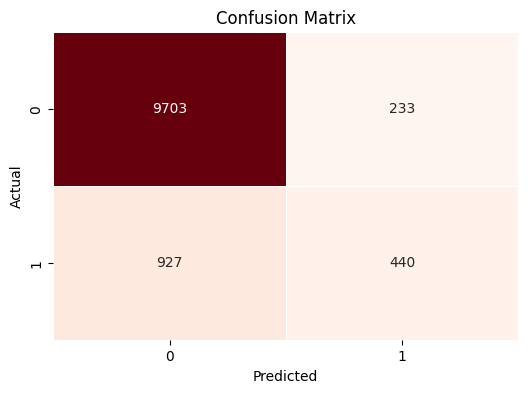

In [19]:
log = lr.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9936
           1       0.65      0.32      0.43      1367

    accuracy                           0.90     11303
   macro avg       0.78      0.65      0.69     11303
weighted avg       0.88      0.90      0.88     11303



Согласно отчёту, наша модель имеет точность 0.90 и при этои процент нахождения объектов класс 0 - 94%, а 1 - 43% и подсвечивает дисбаланс классов и делает точность модели не ценной для оценки так как не отражет полезной информации

Процент первого класса среди найденых "1" около 50%, что тоже не очень верно, относительно состояния имеющегося параметра "y"

<Axes: xlabel='y', ylabel='count'>

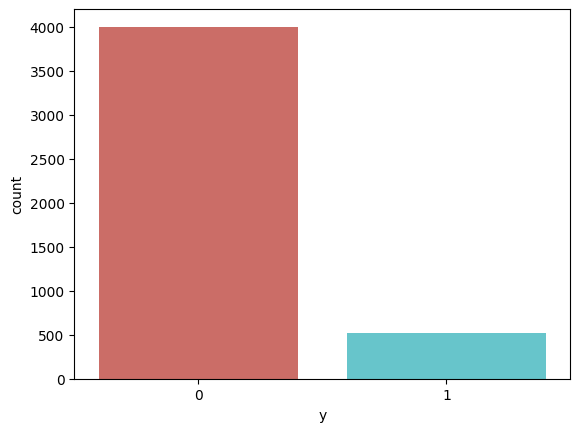

In [21]:
sns.countplot(x='y', data=df_test, palette='hls')

In [22]:
print(f'Precision for Dummy Classificator: {precision_score(y_test, y_pred_dummy, zero_division=0)}')
print(f'Precision for Logistic regression: {precision_score(y_test, y_pred_lr, zero_division=0)}')

Precision for Dummy Classificator: 0.0
Precision for Logistic regression: 0.6537890044576523


Как видно наша модель логистической регрессии плохо находит объекты по классам, то есть 0.65

In [23]:
print(f'Recall for Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')
print(f'Recall for Logistic regression: {recall_score(y_test, y_pred_lr)}')

Recall for Dummy Classificator: 0.0
Recall for Logistic regression: 0.3218727139722019


F1 стремится к нулю, получается модель справляется хорошо?
В нашем случае F1 - 43%

In [24]:
print(f'F1-score for Dummy Classificator: {f1_score(y_test, y_pred_dummy)}')
print(f'F1-score for Logistic regression: {f1_score(y_test, y_pred_lr)}')

F1-score for Dummy Classificator: 0.0
F1-score for Logistic regression: 0.43137254901960786


In [25]:
y_pred = lr.predict_proba(X_test)[:, 1]

Чтобы улутшить значения precision и recall нужно иначе разбить данные или не нормализовавыывать их так?
И хотелось посмотреть на кривые метрик и они тоже показывают что что-то я сделала нее так.

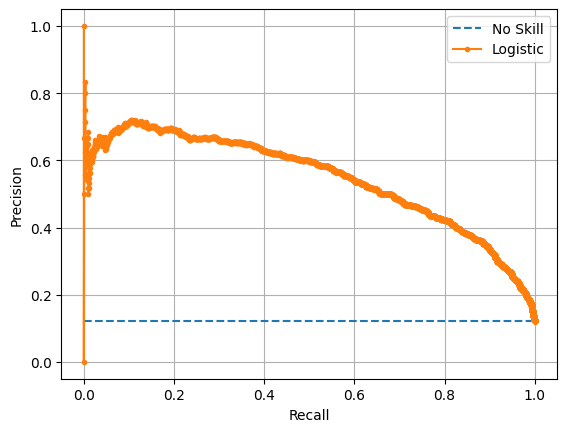

In [26]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

no_skill = len(y_test[y_test == 1]) / len(y_test)

plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()